In [485]:
import tensorflow as tf
np.random.seed(1337)
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


In [486]:
fashion_mnist = keras.datasets.fashion_mnist

In [487]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() 

In [488]:
# You have to play with the train_images, test_images, e.g train_images.shape , len(train_images) 
# To better understand the train data storing

In [489]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [490]:
train_images.shape

(60000, 28, 28)

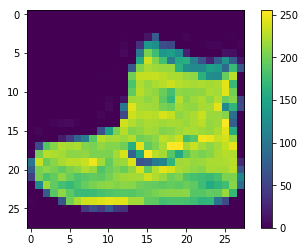

In [491]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [492]:
train_images = train_images / 255.0
test_images = test_images / 255.0

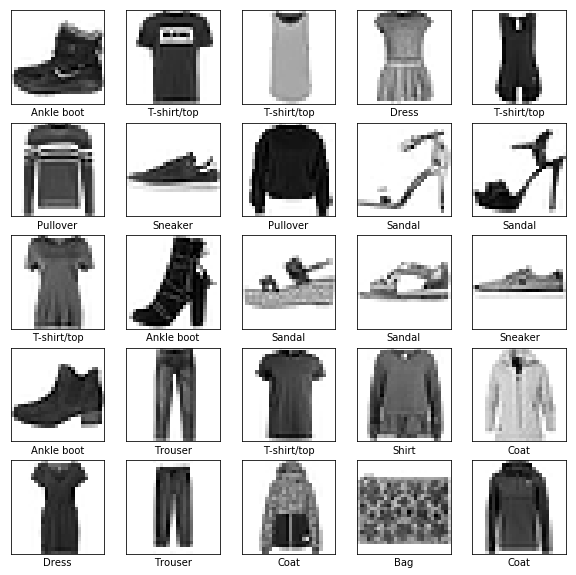

In [493]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [504]:
# This is the place where I implemented the model 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.tanh),
    #keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [505]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [507]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 11s 191us/step - loss: 0.4293 - acc: 0.8446
Epoch 2/5
60000/60000 [==============================] - 10s 172us/step - loss: 0.3639 - acc: 0.8663
Epoch 3/5
60000/60000 [==============================] - 9s 157us/step - loss: 0.3357 - acc: 0.8751
Epoch 4/5
60000/60000 [==============================] - 9s 156us/step - loss: 0.3128 - acc: 0.8836
Epoch 5/5
60000/60000 [==============================] - 10s 169us/step - loss: 0.2961 - acc: 0.8883


In [483]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 108us/step
Test accuracy: 0.871


In [353]:
predictions = model.predict(test_images)

In [354]:
predictions[0]

array([2.6767785e-07, 7.6223161e-10, 7.2635331e-10, 1.9277160e-10,
       4.7374304e-09, 3.6394937e-04, 3.7113043e-08, 5.9522702e-03,
       2.9323115e-07, 9.9368322e-01], dtype=float32)

In [355]:
np.argmax(predictions[0])

9

In [356]:
test_labels[0]

9

In [363]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

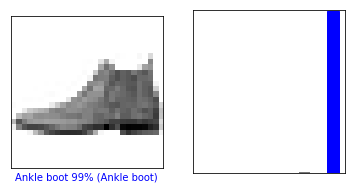

In [364]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

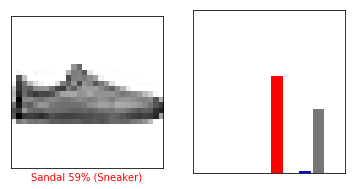

In [368]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

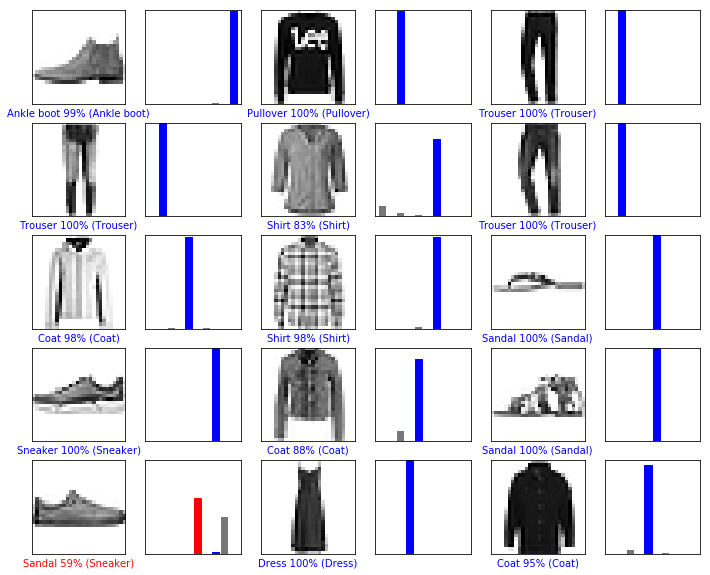

In [369]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [370]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [371]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [372]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.6767862e-07 7.6223305e-10 7.2635331e-10 1.9277123e-10 4.7374304e-09
  3.6394937e-04 3.7113043e-08 5.9522702e-03 2.9323198e-07 9.9368322e-01]]


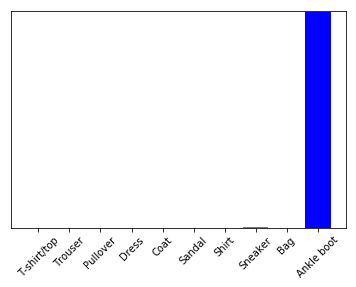

In [374]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [375]:
np.argmax(predictions_single[0])

9